# A Semi-automatic Classification of Normal Karyotypes using Convolutional Neural Network Algorithm

- **Chuan Yang**, MD, PhD Student
- Mentor: **Yanyan Zhao**, MD, PhD
- Shengjing Hospital of China Medical University

## Modules

In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sb

from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow import keras

from os import walk

import time
import datetime

%matplotlib inline

## Samples


## Chormosome Label Convert by using Dictionary

In [2]:
chromConvert = {'chr_01': 1, 
               'chr_02': 2, 
               'chr_03': 3, 
               'chr_04': 4, 
               'chr_05': 5, 
               'chr_06': 6, 
               'chr_07': 7, 
               'chr_08': 8, 
               'chr_09': 9, 
               'chr_10': 10, 
               'chr_11': 11, 
               'chr_12': 12, 
               'chr_13': 13, 
               'chr_14': 14, 
               'chr_15': 15, 
               'chr_16': 16, 
               'chr_17': 17, 
               'chr_18': 18, 
               'chr_19': 19, 
               'chr_20': 20, 
               'chr_21': 21, 
               'chr_22': 22, 
               'chr_x': 0, 
               'chr_y': 23, 
                'chr_18_p11_deletion': 24,
                'chr_18_q10_isochromosome': 25,
                'chr_9_inversion': 26,
                'chr_5_p14_deletion': 27,
                'chr_x_isochromosome': 28,
                'chr_x_p22_cnv': 29, 
                'chr_x_q21_cnv': 30,
                'chr_x_q22_deletion': 31
               }

## File Import

In [3]:
#pathBase = 'C:\\Users\\Chuan\\OneDrive\\Dowrun\\Database\\PhD\\KaryoTypes\\Arrangement\\'
pathBase = 'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement\\'
#pathBase = 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement\\'

theWhole = {}


f = []
f_09 = []
mypath_09 = pathBase + 'chr_09'
for (dirpath, dirnames, filenames) in walk(mypath_09):
    f.extend(filenames)
for l in f:
    f_09.append(mypath_09 + '\\' + l)    
    
  
# ///////// Abnormal ones //////////////

f = []
f_9_inversion = []
mypath_9_inversion = pathBase + 'chr_9_inversion'
for (dirpath, dirnames, filenames) in walk(mypath_9_inversion):
    f.extend(filenames)
for l in f:
    f_9_inversion.append(mypath_9_inversion + '\\' + l)  

theWhole['chr_09'] = f_09

theWhole['chr_9_inversion'] = f_9_inversion

In [4]:
theWhole['chr_9_inversion']

['I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement\\chr_9_inversion\\W27694-1.jpg.9inv.bmp',
 'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement\\chr_9_inversion\\W27694-10.jpg.9inv.bmp',
 'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement\\chr_9_inversion\\W27694-11.jpg.9inv.bmp',
 'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement\\chr_9_inversion\\W27694-12.jpg.9inv.bmp',
 'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement\\chr_9_inversion\\W27694-2_.jpg.9invs.bmp',
 'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement\\chr_9_inversion\\W27694-3.jpg.9inv.bmp',
 'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement\\chr_9_inversion\\W27694-4.jpg.9inv.bmp',
 'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement\\chr_9_inversion\\W27694-5.jpg.9inv.bmp',
 'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement\\chr_9_inversion\\W27694-6.jpg.9inv.bmp',
 'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement\\chr_9_inversion\

## Image Input

In [5]:
start = time.time()

image = {}
i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in theWhole[chrNo]:
        img = Image.open(case)
        image[chrNo].append(img)
    
end = time.time()
print(end - start)

0.12737298011779785


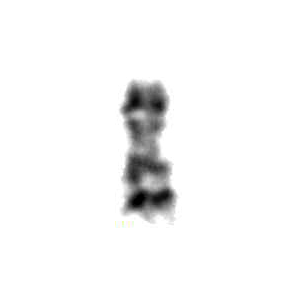

In [6]:
image['chr_9_inversion'][1]

## Functions

In [7]:
def extractData(image):
    x = image.size[0]
    y = image.size[1]
    
    matrix = []
    rgb_matrix = []

    for i in range(x):
        matrix.append([])
        rgb_matrix.append([])
        
        for j in range(y):
            r, g, b = image.getpixel((j, i))            
            value = r * 299.0/1000 + g * 587.0/1000 + b * 114.0/1000
            value = int(value)
            matrix[i].append(value)
            rgb_matrix[i].append((r,g,b))
    return matrix, rgb_matrix

In [8]:
def imageReconstruct(matrix):
    df = np.array(matrix, dtype=np.uint8)
    img = Image.fromarray(df, 'RGB')
    img.save('image.png')
    return img

## Data Extraction from Images

In [9]:
start = time.time()

data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)
        
end = time.time()
print(end - start)

14.459371328353882


In [10]:
imageMatrix = np.array(data['chr_9_inversion'][1])

In [11]:
array = {}

for chrNo in data.keys():
    array[chrNo] = []
    for case in data[chrNo]:            
        array[chrNo].append(case)

x_train_list = []
y_train_list = []

for y, x in array.items():    
    for x_item in x:
        x_train_list.append(x_item)
        y_train_list.append(y)

In [12]:
len(x_train_list[1])

300

In [13]:
len(y_train_list)

109

### Validation Dataset

In [14]:
#pathBase = 'C:\\Users\\Chuan\\OneDrive\\Dowrun\\Database\\PhD\\KaryoTypes\\Arrangement\\test\\'
pathBase = 'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement\\test\\'
#pathBase = 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement\\test\\'

theWhole = {}

f = []
f_09 = []
mypath_09 = pathBase + 'chr_09'
for (dirpath, dirnames, filenames) in walk(mypath_09):
    f.extend(filenames)
for l in f:
    f_09.append(mypath_09 + '\\' + l)    
    
  
# ///////// Abnormal ones //////////////

f = []
f_9_inversion = []
mypath_9_inversion = pathBase + 'chr_9_inversion'
for (dirpath, dirnames, filenames) in walk(mypath_9_inversion):
    f.extend(filenames)
for l in f:
    f_9_inversion.append(mypath_9_inversion + '\\' + l)  

theWhole['chr_09'] = f_09

theWhole['chr_9_inversion'] = f_9_inversion

In [15]:
image = {}
i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in theWhole[chrNo]:
        img = Image.open(case)
        image[chrNo].append(img)    

### Data Extraction

In [16]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

In [17]:
array = {}

for chrNo in data.keys():
    array[chrNo] = []
    for case in data[chrNo]:            
        array[chrNo].append(case)

x_test_list = []
y_test_list = []

for y, x in array.items():    
    for x_item in x:
        x_test_list.append(x_item)
        y_test_list.append(y)

## ChromConvert

In [18]:
y_train_digital_list = []
for item in y_train_list:
    y_train_digital_list.append(chromConvert[item])
    
y_test_digital_list = []
for item in y_test_list:
    y_test_digital_list.append(chromConvert[item])

## Numpy Array

In [19]:
X_train = np.array(x_train_list)
y_train = np.array(y_train_digital_list)

In [20]:
X_test = np.array(x_test_list)
y_test = np.array(y_test_digital_list)

In [21]:
y_test

array([ 9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 26, 26, 26, 26, 26, 26, 26,
       26, 26, 26])

In [22]:
len(X_train)

109

In [23]:
len(y_train)

109

In [24]:
X_train[0].shape

(300, 300)

## Save the Datasets

In [25]:
np.save('X_train_2D_KaryoLearning_Abnormal', X_train)
np.save('y_train_2D_KaryoLearning_Abnormal', y_train)

In [26]:
np.save('X_test_2D_KaryoLearning_Abnormal', X_test)
np.save('y_test_2D_KaryoLearning_Abnormal', y_test)

## Load the Datasets

In [27]:
X_train = np.load('X_train_2D_KaryoLearning_Abnormal.npy')
y_train = np.load('y_train_2D_KaryoLearning_Abnormal.npy')

X_test = np.load('X_test_2D_KaryoLearning_Abnormal.npy')
y_test = np.load('y_test_2D_KaryoLearning_Abnormal.npy')

## Convolutional Neural Network

## Data Preparation

In [28]:
X_train = X_train.reshape(-1, 300, 300, 1)
X_test = X_test.reshape(-1, 300, 300, 1)

### Training

#### Model

In [35]:
model = Sequential()

In [36]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

In [37]:
model.add(Flatten())
model.add(Dense(300, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(32, activation='softmax'))

#### Tensorboard Initilization

In [38]:
%load_ext tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


#### Compile the modal

In [39]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### Training

In [40]:
model.fit(X_train, y_train, epochs=200, batch_size=64, verbose=1, 
          validation_data=(X_test, y_test),
          callbacks=[tensorboard_callback])

Epoch 1/200
2/2 [==============================] - 6s 3s/step - loss: 256.3949 - accuracy: 0.0000e+00 - val_loss: 492.2177 - val_accuracy: 0.5000
Epoch 2/200
2/2 [==============================] - 5s 2s/step - loss: 130.1821 - accuracy: 0.5321 - val_loss: 150.5021 - val_accuracy: 0.5000
Epoch 3/200
2/2 [==============================] - 5s 2s/step - loss: 60.8370 - accuracy: 0.4954 - val_loss: 83.5275 - val_accuracy: 0.5000
Epoch 4/200
2/2 [==============================] - 5s 2s/step - loss: 17.7703 - accuracy: 0.8899 - val_loss: 47.0390 - val_accuracy: 0.5000
Epoch 5/200
2/2 [==============================] - 5s 2s/step - loss: 6.3154 - accuracy: 0.8899 - val_loss: 21.2860 - val_accuracy: 0.5000
Epoch 6/200
2/2 [==============================] - 5s 2s/step - loss: 28.2967 - accuracy: 0.3394 - val_loss: 12.1640 - val_accuracy: 0.5000
Epoch 7/200
2/2 [==============================] - 5s 2s/step - loss: 2.7370 - accuracy: 0.5321 - val_loss: 2.1874 - val_accuracy: 0.5000
Epoch 8/200
2/2

2/2 [==============================] - 5s 2s/step - loss: 1.5747e-04 - accuracy: 1.0000 - val_loss: 0.2040 - val_accuracy: 0.9000
Epoch 60/200
2/2 [==============================] - 5s 2s/step - loss: 8.5794e-04 - accuracy: 1.0000 - val_loss: 0.1942 - val_accuracy: 0.9000
Epoch 61/200
2/2 [==============================] - 5s 2s/step - loss: 7.5422e-04 - accuracy: 1.0000 - val_loss: 0.1380 - val_accuracy: 0.9000
Epoch 62/200
2/2 [==============================] - 5s 2s/step - loss: 6.1726e-04 - accuracy: 1.0000 - val_loss: 0.0904 - val_accuracy: 0.9000
Epoch 63/200
2/2 [==============================] - 5s 2s/step - loss: 4.0900e-04 - accuracy: 1.0000 - val_loss: 0.0641 - val_accuracy: 1.0000
Epoch 64/200
2/2 [==============================] - 5s 2s/step - loss: 2.9066e-04 - accuracy: 1.0000 - val_loss: 0.0509 - val_accuracy: 1.0000
Epoch 65/200
2/2 [==============================] - 5s 2s/step - loss: 2.8927e-04 - accuracy: 1.0000 - val_loss: 0.0429 - val_accuracy: 1.0000
Epoch 66/200

Epoch 117/200
2/2 [==============================] - 5s 2s/step - loss: 5.8126e-06 - accuracy: 1.0000 - val_loss: 0.0307 - val_accuracy: 1.0000
Epoch 118/200
2/2 [==============================] - 5s 2s/step - loss: 5.6037e-06 - accuracy: 1.0000 - val_loss: 0.0306 - val_accuracy: 1.0000
Epoch 119/200
2/2 [==============================] - 5s 2s/step - loss: 5.4463e-06 - accuracy: 1.0000 - val_loss: 0.0305 - val_accuracy: 1.0000
Epoch 120/200
2/2 [==============================] - 5s 2s/step - loss: 5.2680e-06 - accuracy: 1.0000 - val_loss: 0.0304 - val_accuracy: 1.0000
Epoch 121/200
2/2 [==============================] - 5s 2s/step - loss: 5.1116e-06 - accuracy: 1.0000 - val_loss: 0.0303 - val_accuracy: 1.0000
Epoch 122/200
2/2 [==============================] - 5s 2s/step - loss: 4.9585e-06 - accuracy: 1.0000 - val_loss: 0.0303 - val_accuracy: 1.0000
Epoch 123/200
2/2 [==============================] - 5s 2s/step - loss: 4.8623e-06 - accuracy: 1.0000 - val_loss: 0.0302 - val_accuracy:

Epoch 174/200
2/2 [==============================] - 5s 2s/step - loss: 2.0539e-06 - accuracy: 1.0000 - val_loss: 0.0280 - val_accuracy: 1.0000
Epoch 175/200
2/2 [==============================] - 5s 2s/step - loss: 2.0265e-06 - accuracy: 1.0000 - val_loss: 0.0280 - val_accuracy: 1.0000
Epoch 176/200
2/2 [==============================] - 5s 2s/step - loss: 2.0014e-06 - accuracy: 1.0000 - val_loss: 0.0280 - val_accuracy: 1.0000
Epoch 177/200
2/2 [==============================] - 5s 2s/step - loss: 1.9784e-06 - accuracy: 1.0000 - val_loss: 0.0280 - val_accuracy: 1.0000
Epoch 178/200
2/2 [==============================] - 5s 2s/step - loss: 1.9609e-06 - accuracy: 1.0000 - val_loss: 0.0279 - val_accuracy: 1.0000
Epoch 179/200
2/2 [==============================] - 5s 2s/step - loss: 1.9369e-06 - accuracy: 1.0000 - val_loss: 0.0279 - val_accuracy: 1.0000
Epoch 180/200
2/2 [==============================] - 5s 2s/step - loss: 1.9183e-06 - accuracy: 1.0000 - val_loss: 0.0278 - val_accuracy:

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 298, 298, 32)      320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 322624)            0         
_________________________________________________________________
dense_11 (Dense)             (None, 300)              

### Tensorboard Display

In [42]:
%tensorboard --logdir logs/fit

## Performance Measures

In [43]:
#y_predict = clf.predict(X_test)
#y_test = y_test

loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 1.000


In [44]:
len(X_test)

20

In [45]:
y_predict = model.predict(X_test)

In [46]:
len(y_predict)

20

In [47]:
y_predict[12]

array([1.8968056e-11, 4.1559048e-11, 5.2276471e-11, 6.6156009e-12,
       8.1148657e-13, 1.8084327e-15, 7.6758521e-13, 1.1412754e-12,
       7.3957953e-15, 7.7036871e-10, 1.1514687e-20, 1.5198870e-12,
       3.3354890e-17, 4.6705283e-13, 1.1891891e-14, 2.1476931e-27,
       3.0644409e-23, 8.9928531e-15, 2.3047204e-18, 2.6775705e-21,
       3.0332254e-23, 1.9743512e-24, 6.9864886e-21, 1.0744975e-16,
       1.6092432e-25, 3.4215899e-17, 1.0000000e+00, 2.0868191e-16,
       1.4131937e-22, 2.1122283e-19, 2.6905882e-18, 3.4720550e-16],
      dtype=float32)

In [48]:
# The number 34 means the type number of all chromosome class number inlcuding abnormal ones
y_predict_filtered = []

for sample in y_predict:
    maximum = 0
    indicator = 0
    for i in range(32):
        if sample[i] > maximum:
            maximum = sample[i]
            indicator = i
    y_predict_filtered.append(indicator)        

In [49]:
y_predict_filtered[12]

26

In [50]:
len(y_predict_filtered)

20

In [51]:
len(y_test)

20

### Confusion Matrix (混淆矩阵)

In [52]:
label = ['chr_01', 'chr_02', 'chr_03',  'chr_04', 'chr_05', 'chr_06', 'chr_07',  'chr_08',  'chr_09', 'chr_10',
'chr_11', 'chr_12', 'chr_13', 'chr_14', 'chr_15',  'chr_16', 'chr_17', 'chr_18', 'chr_19',  'chr_20',  
'chr_21', 'chr_22', 'chr_x', 'chr_y',  'chr_18_p11_deletion', 'chr_18_q10_isochromosome', 
'chr_9_inversion', 'chr_5_p14_deletion', 
'chr_x_isochromosome', 'chr_x_p22_cnv', 'chr_x_q21_cnv',  'chr_x_q22_deletion']

In [53]:
cm = np.array(confusion_matrix(y_test, y_predict_filtered, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9 ,
                                                                   10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 
                                                                  20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
                                                                  30, 31]))
confusion = pd.DataFrame(cm, index=label,
                        columns=label)
confusion.to_csv('ConfusionMatrix_KaryoType_CNN.csv')
confusion

,chr_01,chr_02,chr_03,chr_04,chr_05,chr_06,chr_07,chr_08,chr_09,chr_10,...,chr_x,chr_y,chr_18_p11_deletion,chr_18_q10_isochromosome,chr_9_inversion,chr_5_p14_deletion,chr_x_isochromosome,chr_x_p22_cnv,chr_x_q21_cnv,chr_x_q22_deletion
chr_01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr_02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr_03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr_04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr_05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr_06,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr_07,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr_08,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr_09,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr_10,0,0,0,0,0,0,0,0,0,10,...,0,0,0,0,0,0,0,0,0,0


In [54]:
print(classification_report(y_test, y_predict_filtered))

              precision    recall  f1-score   support

           9       1.00      1.00      1.00        10
          26       1.00      1.00      1.00        10

   micro avg       1.00      1.00      1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



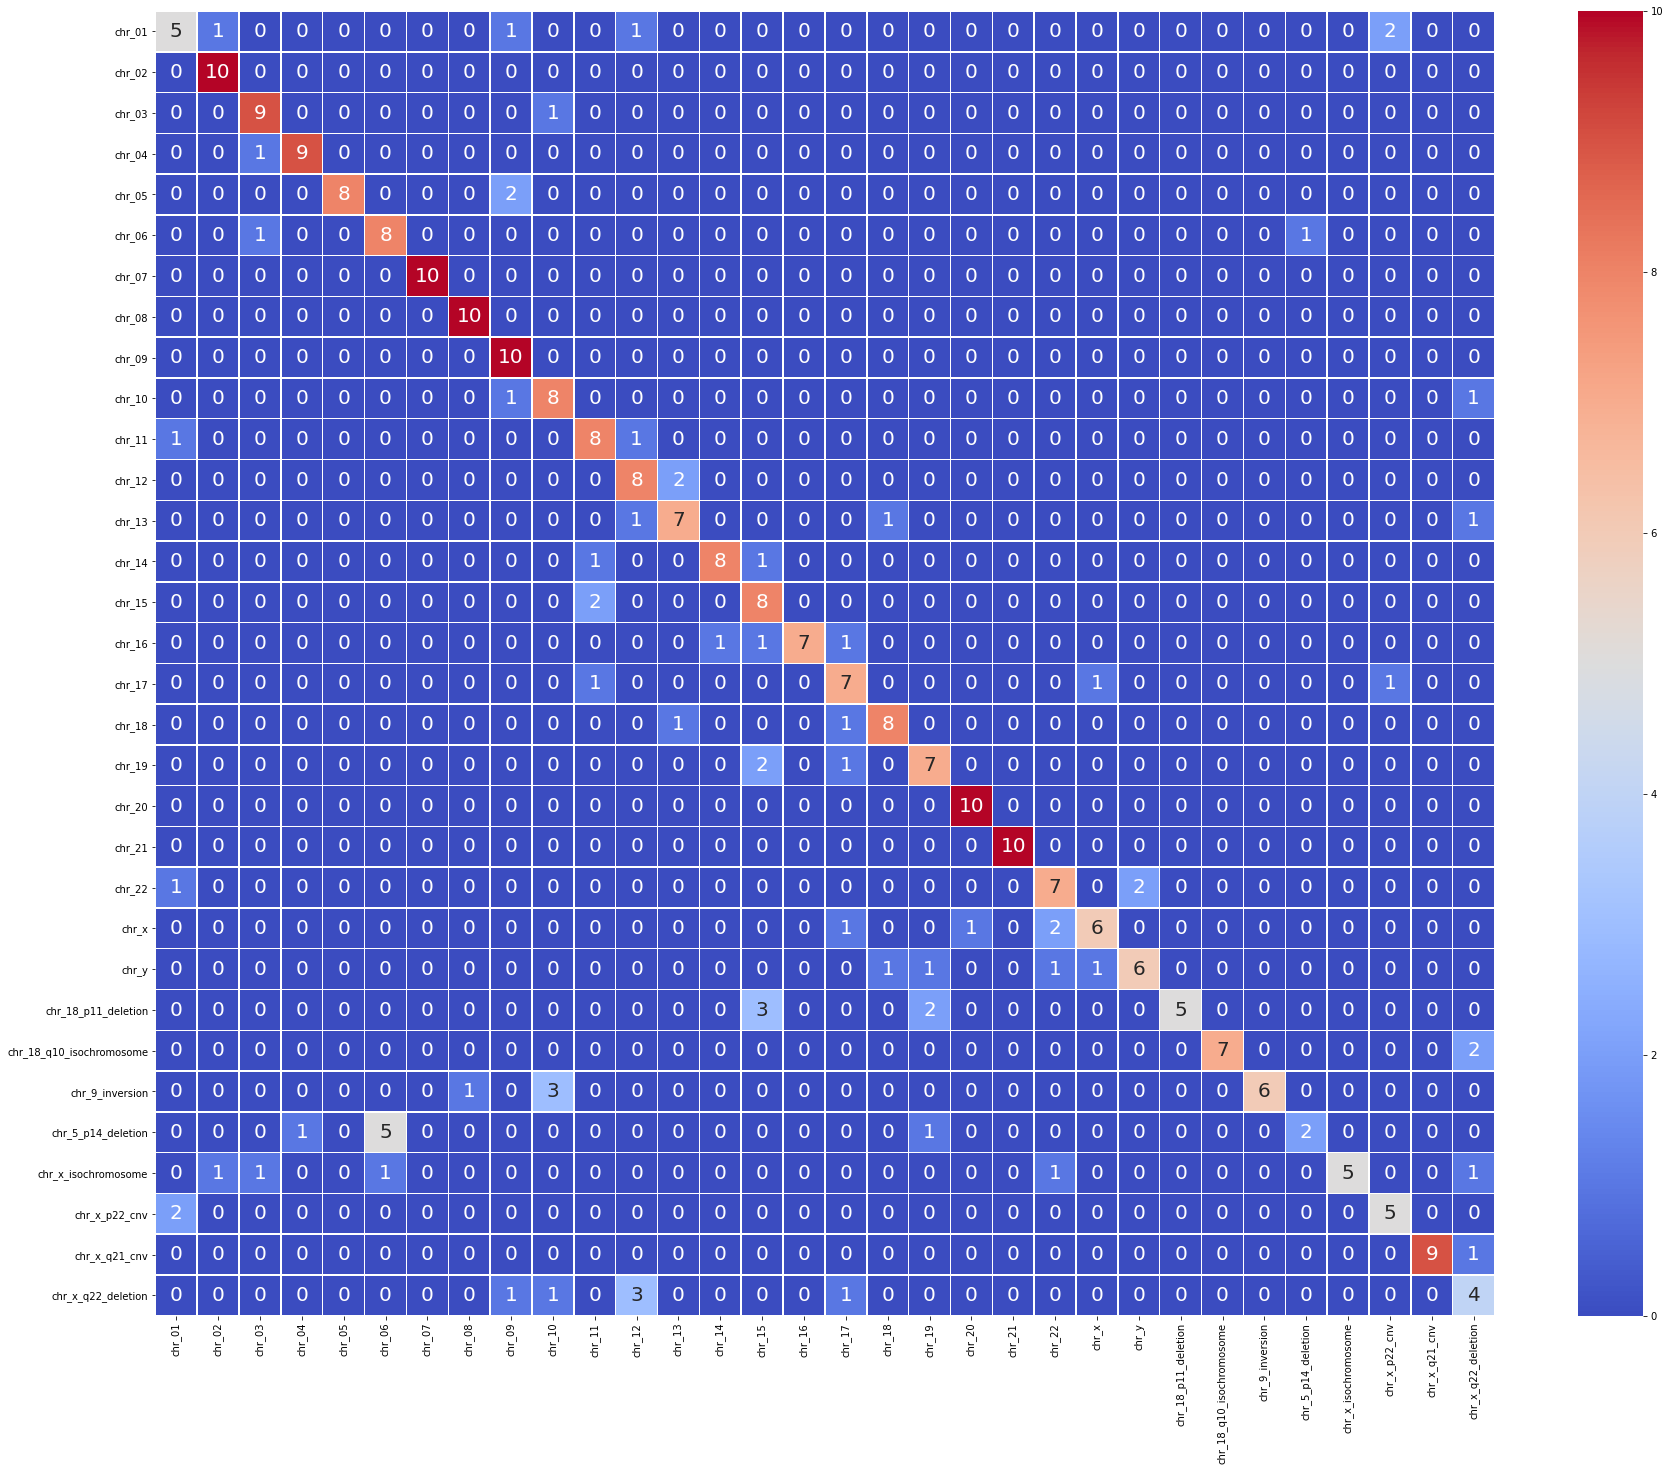

In [49]:
plt.figure(figsize=(30, 24))
heat_map = sb.heatmap(confusion, annot=True, 
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=.5, 
                      annot_kws={"size": 20})

## Save the Model

In [50]:
model.save('saved_model/model_cnn')

INFO:tensorflow:Assets written to: saved_model/model_cnn\assets


## Load the Model

In [51]:
model_reload = keras.models.load_model('saved_model/model_cnn')